In [1]:
import pandas as pd
import numpy as np

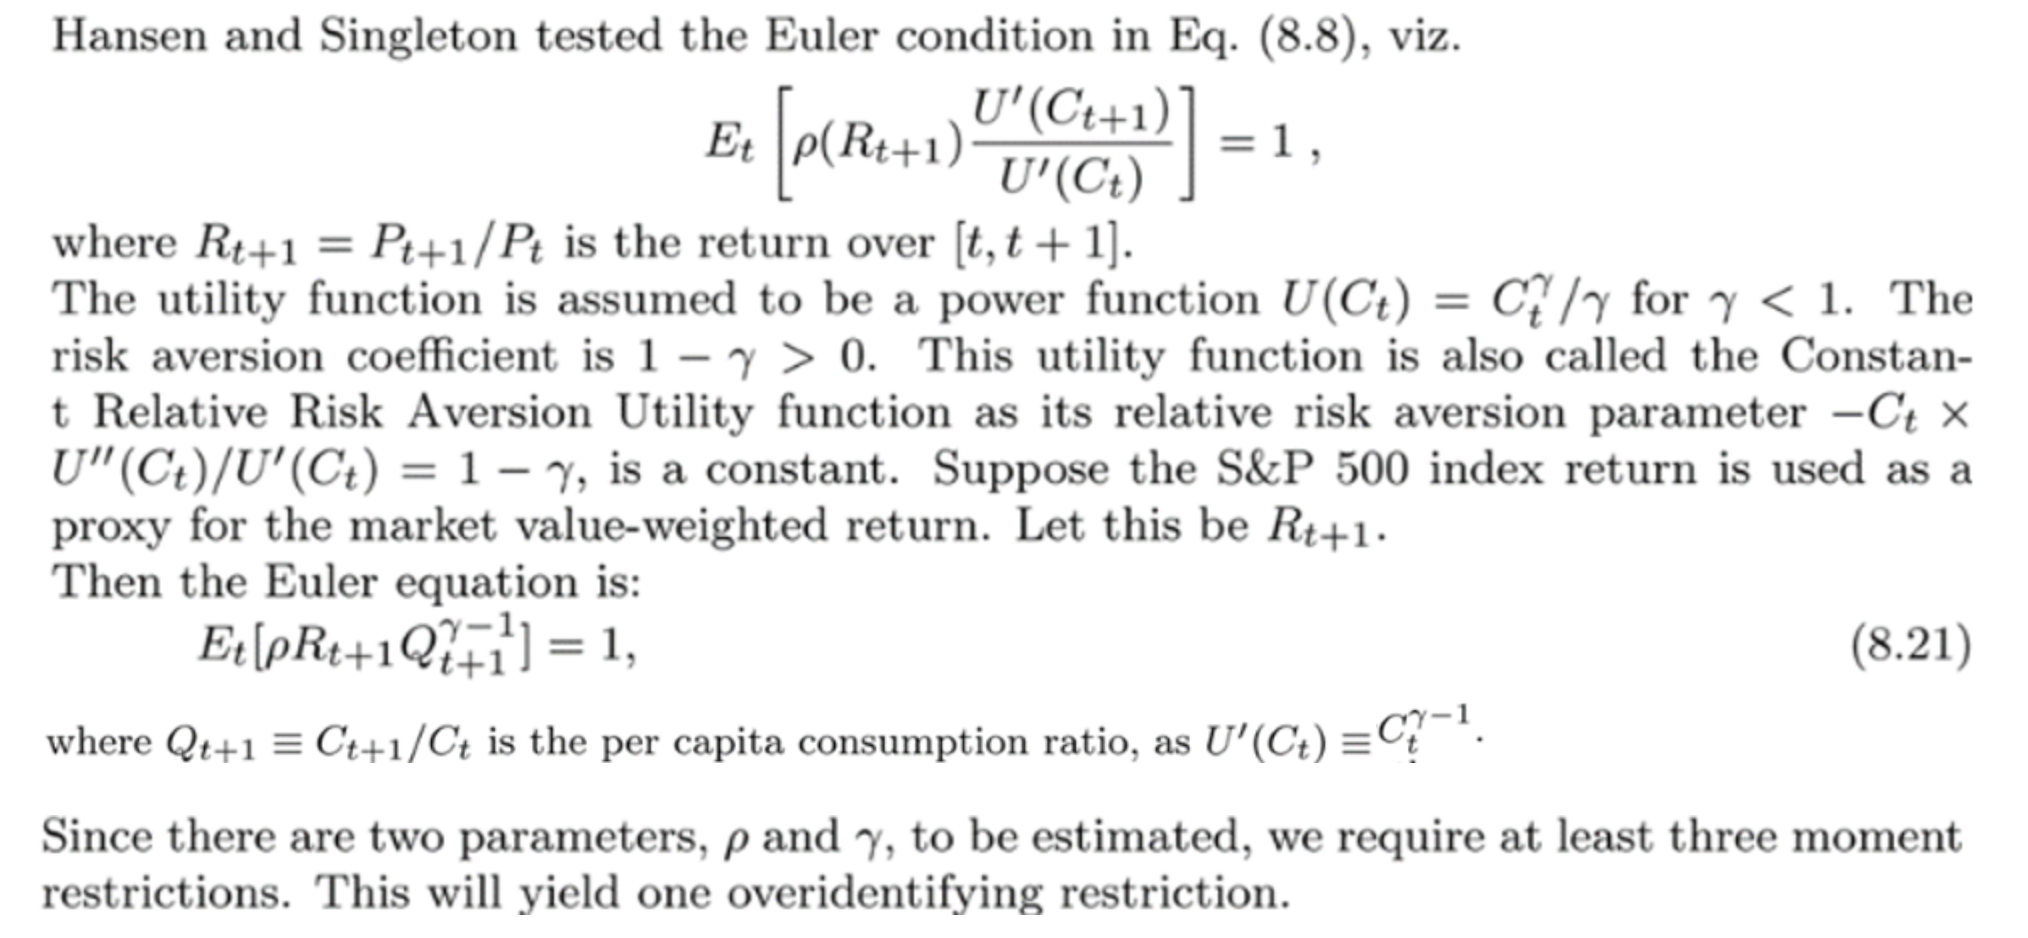

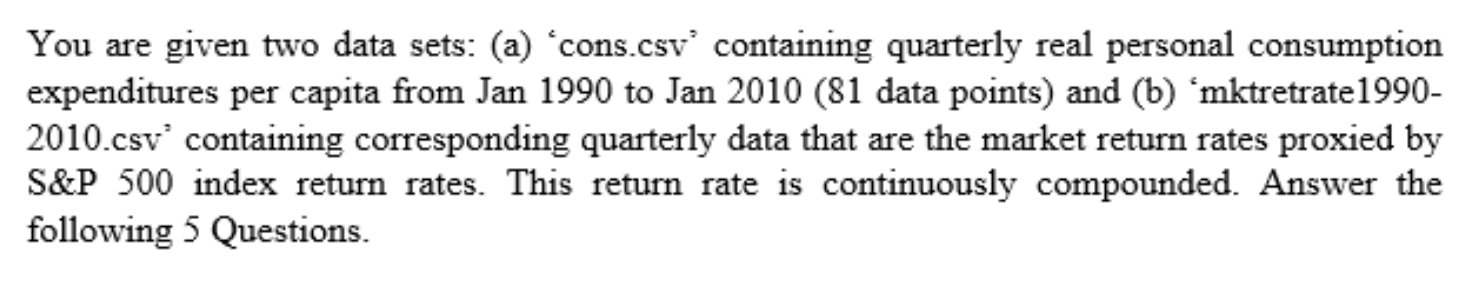

In [2]:
# R = pd.read_csv("mktretrate1990-2010.csv", index_col = 'Date')
# R_lag1 = R.shift(1)[2:]
# R_lag2 = R.shift(2)[2:]
# R = R[2:]

# R_lag = pd.DataFrame({"R_lag1":R_lag1['Mkretrate'],"R_lag2":R_lag2['Mkretrate']})

# C = pd.read_csv("cons.csv", index_col = 'Date')
# C_lag = C.shift(1)
# Q = (C/C_lag)[2:]

In [3]:
pd.read_csv("mktretrate1990-2010.csv", index_col = 'Date')

,Mkretrate
Date,
1/1/1990,-0.033703
1/4/1990,0.005213
1/7/1990,0.073838
1/10/1990,-0.158324
1/1/1991,0.123410
...,...
1/1/2009,-0.159557
1/4/2009,0.055268
1/7/2009,0.123438


In [4]:
R = pd.read_csv("mktretrate1990-2010.csv")['Mkretrate']
R = np.exp(R)
R_lag1 = R.shift(1)[2:]
R_lag2 = R.shift(2)[2:]
R = R[2:]

In [5]:
R_lag = np.column_stack((R_lag1, R_lag2))

In [13]:
C = pd.read_csv("cons.csv")['Cons']
C_lag = C.shift(1)
Q = (C/C_lag)[2:]
C_lag = C_lag[2:]
C = C[2:]

# Q1

Using all the given data, test the Euler equation using lagged returns Rt and Rt-1 as instruments. What is the asymptotic GMM estimate of r and its z test-statistic value based on the null that r = 1? Find the closest estimates.

In [7]:
from statsmodels.sandbox.regression.gmm import GMM

#inst = np.column_stack((np.ones(len(R_lag1)), R_lag1, R_lag2))
inst = R_lag

class gmm(GMM):
    def momcond(self, params):
        p0, p1 = params
        endog = self.endog
        exog = self.exog.squeeze()
        inst = self.instrument 

        error1 = p0*endog*exog**(p1-1) - 1
        error2 = (p0*endog*exog**(p1-1) - 1) * inst[:,0]
        error3 = (p0*endog*exog**(p1-1) - 1) * inst[:,1]
        g = np.column_stack((error1, error2, error3))
        return g

initial0 = np.array([1, 1])
results = gmm(endog = R, exog = Q, instrument = inst, k_moms=3, k_params=2).fit(initial0)

### numpy.squeeze() function is used when we want to remove single-dimensional entries from the shape of an array, e.g. [[[2,2],[3,3]]] to [[2,2],[3,3]]

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000038
         Iterations: 6
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3


In [8]:
print(results.summary())

                                 gmm Results                                  
Dep. Variable:              Mkretrate   Hansen J:                     0.002569
Model:                            gmm   Prob (Hansen J):                 0.960
Method:                           GMM                                         
Date:                Sat, 24 Feb 2024                                         
Time:                        13:24:37                                         
No. Observations:                  79                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0            1.0154      0.028     35.956      0.000       0.960       1.071
p 1           -6.3141      5.408     -1.167      0.243     -16.914       4.286


In [9]:
(results.params[0]-1)/0.028

0.5493151520733565

# Q2

Using all the given data, test the Euler equation using lagged returns Rt and Rt-1 as instruments. What is the asymptotic GMM estimate of the relative risk aversion parameter and its standard error based on the null that the parameter = 0? Find the closest estimates.

# Q3

Based on GMM estimation in Q1 and Q2, what is the J-statistic and its p-value in the test of the model?

# Q4

Suppose the returns Rt+1 , Rt , Rt-1 , etc. are autocorrelated, will the GMM method yield similar asymptotic estimates?

# Q5

Suppose the moment restriction is developed as the following instead:

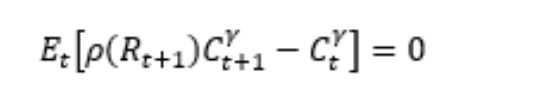

will the GMM estimation and testing yield similar results as those in Q1,2,3?

In [15]:
from statsmodels.sandbox.regression.gmm import GMM

#inst = np.column_stack((np.ones(len(R_lag1)), R_lag1, R_lag2))
inst = R_lag

class gmm(GMM):
    def momcond(self, params):
        p0, p1 = params
        endog = self.endog
        exog = self.exog.squeeze()
        inst = self.instrument 

        error1 = p0*endog*exog**(p1) - 1
        error2 = (p0*endog*exog**(p1) - 1) * inst[:,0]
        error3 = (p0*endog*exog**(p1) - 1) * inst[:,1]
        g = np.column_stack((error1, error2, error3))
        return g

initial0 = np.array([1, 1])
results5 = gmm(endog = R, exog = Q, instrument = inst, k_moms=3, k_params=2).fit(initial0)

### numpy.squeeze() function is used when we want to remove single-dimensional entries from the shape of an array, e.g. [[[2,2],[3,3]]] to [[2,2],[3,3]]

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000037
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000033
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3


In [17]:
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:              Mkretrate   Hansen J:                     0.002569
Model:                            gmm   Prob (Hansen J):                 0.960
Method:                           GMM                                         
Date:                Sat, 24 Feb 2024                                         
Time:                        13:39:33                                         
No. Observations:                  79                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0            1.0154      0.028     35.956      0.000       0.960       1.071
p 1           -7.3141      5.408     -1.352      0.176     -17.914       3.286
==============================================================================
"""